In [7]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="urubu100",
  password="urubu100",
  database="cortisol"
)
cursor = mydb.cursor()
print(mydb)

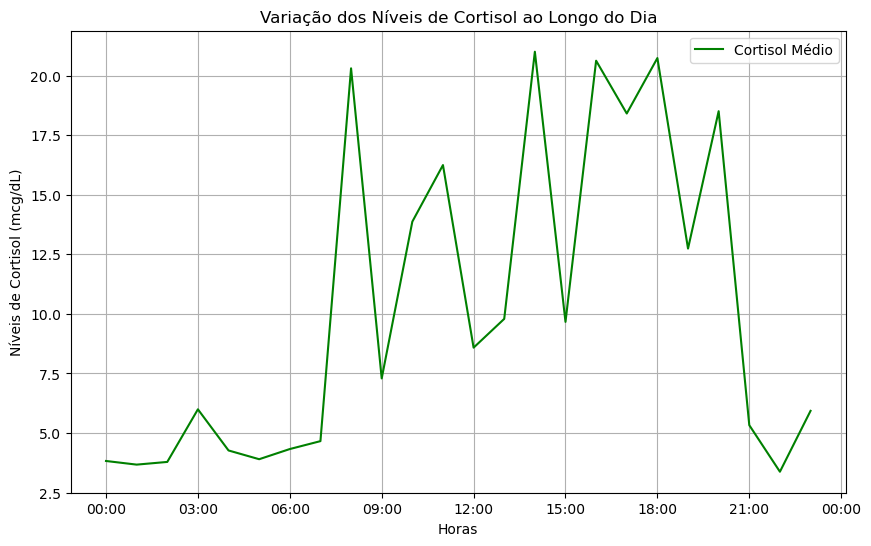

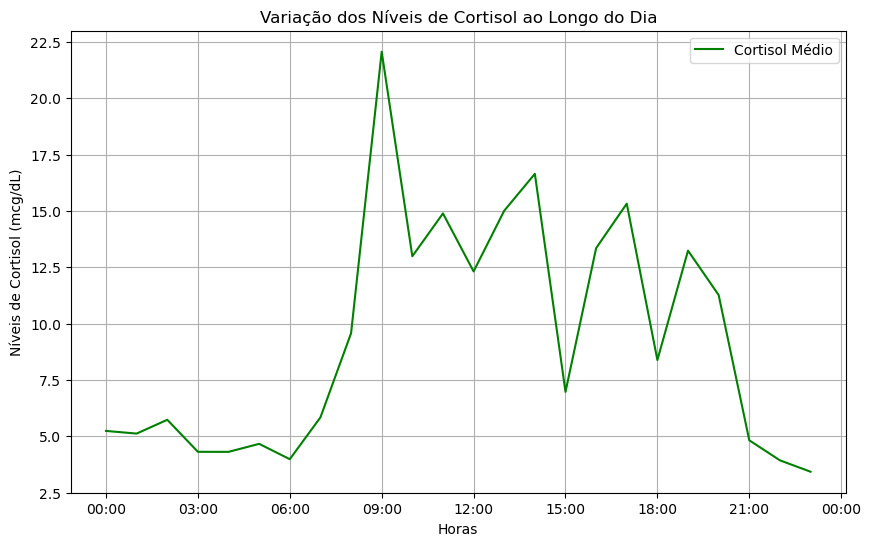

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import random

def gerarDados(qtdPessoas):
    for pessoa in range(qtdPessoas):
        horas = list(range(24))
        cortisol_medio = []
        for hora in horas:
            if hora < 8 or hora > 20:  # Noite
                cortisol = random.uniform(3, 6)
            else:  # Dia
                cortisol = random.uniform(6, 23)
            cortisol_medio.append(cortisol)

            data_hora = datetime(2024, 1, 1, hora, 0)  

            sql = "INSERT INTO dados_cortisol (dado_cortisol, data_horario, id_pessoa) VALUES (%s, %s, %s)"
            valores = (cortisol, data_hora, pessoa)

            cursor.execute(sql, valores)

        mydb.commit()

        # cursor.close()
        # mydb.close()


        # Convertendo as horas para o formato de data/hora
        horas_formatadas = [datetime(2024, 1, 1, hora, 0) for hora in horas]

        plt.figure(figsize=(10, 6))
        plt.plot(horas_formatadas, cortisol_medio, label='Cortisol Médio', color='green')

        # Formatando o eixo x como horas
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

        plt.xlabel('Horas')
        plt.ylabel('Níveis de Cortisol (mcg/dL)')
        plt.title('Variação dos Níveis de Cortisol ao Longo do Dia')

        plt.legend()
        plt.grid(True)

        plt.show()

gerarDados(2)
